In [1]:
import scipy.stats as stats
from math import sqrt

In [6]:
# sample mean or evidence
xbar = 999.6

# sample size | n
n = 40

# Assumed pop mean : 
mu0 = 1000

# givenb pop standard deviation 
sigma = 1.3


z = (xbar - mu0 )/ (sigma/sqrt(n))

p_value = stats.norm.cdf(z)

p_value

0.02582634748790911

## since p value < alpha ( 0.025 < 0.05 ) hence we rejec the null hypothesis 

### Conclusion : true mean is less the assumed mean 
### Actual content is less than the claim

- Ha : mu > 3173
- H0 : mu <= 3173

### this is a right tail test 

In [7]:
# sample mean or evidence
xbar = 3325

# sample size | n
n = 180

# Assumed pop mean : 
mu0 = 3173

# givenb pop standard deviation 
sigma = 1000

z = (xbar - mu0 )/ (sigma/sqrt(n))

p_value = 1 - stats.norm.cdf(z)

p_value

0.02071034728127641

## Conclusions
    - p value < alpha | 0.02 < 0.05 
    - Reject null 
    - mean credit card balance is still increasing 

In [9]:
# sample mean or evidence
xbar = 118

# sample size | n
n = 40

# Assumed pop mean : 
mu0 = 125

# givenb pop standard deviation 
sigma = 30

z = (xbar - mu0 )/ (sigma/sqrt(n))

z
if z <0 :
    p_value = stats.norm.cdf(z) * 2
else :
    p_value = (1 - stats.norm.cdf(z)) * 2
    
p_value

0.140016503197169

## Conclusion :
    - pvalue > alpha | 0.14 >0.05 
    - we fail tio reject null
    - there is no significant difference between the overall mean & meann bonuses & jones& ryans

In [10]:
import pandas as pd

In [11]:
cars = pd.read_csv('~/Desktop/Purdue/Python/Batch_2/Data/cars.csv') 

# T test : one sample t test 

In [21]:
sample = cars.loc[cars.Type == 'Sedan', 'MSRP']

# sample mean :
xbar = sample.mean()

# sample size 
n = sample.size

# Assumed mean : 
mu0 = 35000

# sample std
s = sample.std()

# t stats
t_stats = (xbar - mu0) / (s / sqrt(n))

# p_value: left tail test 

p_value = stats.t.cdf(t_stats, n-1)

print('Results : (statistic={:.4f}, pvalue={})'.format(t_stats,p_value))

Results : (statistic=-5.4282, pvalue=6.505141122517643e-08)


## Conclusion :
    - p value < alpha | 6.5 * 10 ^-08 <<<< 5 * 10 ^-02 
    - We reject the null
    - price of Sedan is not greater than 35000


In [35]:
sample = cars.loc[cars.Type == 'Sedan', 'MSRP']
mu0 = 35000
t, p = stats.ttest_1samp(sample,mu0)

# p value
print('Results : (statistic={:.4f}, pvalue={})'.format(t,p))

Results : (statistic=-5.4282, pvalue=1.3010282245035238e-07)


    - the resulting p value in stats.ttest_1samp is for a two tail test always 
 we need to cconvert oit to 1 tail test as per requirements

In [36]:
def p_results(t,p):
    global p_left , p_right
    if t <0 :
        p_left = p/2
        p_right = 1 - p_left # or 1 - p/2
    else :
        p_right = p/2
        p_left = 1 - p_right # or 1 - p/2
    

In [38]:
sample = cars.loc[cars.Type == 'Sedan', 'MSRP']
mu0 = 35000
t, p = stats.ttest_1samp(sample,mu0)

p_results(t,p)
# p value
print('Results : statistic={:.4f}, pvalue={}'.format(t,p_left))

Results : statistic=-5.4282, pvalue=6.505141122517619e-08


## Independent t test `

- Ha : MPG_Highways for Sedans is not better than SUVs | MPG_Highway(Sedan) < MPG_Highway(SUVs)
- H0 : MPG_Highways for Sedans is better than SUVs | MPG_Highway(Sedan) >= MPG_Highway(SUVs)

In [39]:
sample1 = cars.loc[cars.Type== 'Sedan','MPG_Highway']
sample2 = cars.loc[cars.Type== 'SUV','MPG_Highway']

In [40]:
t, p = stats.ttest_ind(sample1, sample2)
p_results(t,p)
# p value
print('Results : statistic={:.4f}, pvalue={}'.format(t,p_left))

Results : statistic=13.2671, pvalue=1.0


## Conclusion
    - p > alpha : 1 > 0.05
    - we fail to reject null
    - Sedan have better or similar mpg on highways as suvs

- Ha : MPG_Highways for Sedans is better than SUVs | MPG_Highway(Sedan) > MPG_Highway(SUVs)
- H0 : MPG_Highways for Sedans is not better than SUVs | MPG_Highway(Sedan) <= MPG_Highway(SUVs)

In [42]:
t, p = stats.ttest_ind(sample1, sample2)
p_results(t,p)
# p value
print('Results : statistic={:.4f}, pvalue={}'.format(t,p_right))

Results : statistic=13.2671, pvalue=1.3034344540849366e-32


## Conclusion
    - p > alpha : 1.3* 10 -32 <<<< 0.05
    - we reject null
    - Sedan have better mpg on highways as suvs

## Paired  t Test 

In [43]:
sample_data = pd.read_csv('/Users/nimisha/Desktop/Purdue/Python/DA/Sample_data.csv')

In [44]:
sample_data.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


## H0 : is there a difference

In [45]:
stats.ttest_rel(sample_data.Math1, sample_data.Math2)

Ttest_relResult(statistic=1.3555927189268235, pvalue=0.17676525605507354)

# ANOVA

## H0 : all have not significantly diff means

In [48]:
top5 = cars.Make.value_counts()[:5].index
top5

Index(['Toyota', 'Chevrolet', 'Mercedes-Benz', 'Ford', 'BMW'], dtype='object')

### stats.f_oneway(sample1, sample2, ....)

In [66]:
for i in range(len(top5)):
    exec("sample{} = cars.loc[(cars.Make == '{}') &(cars.Type =='Sedan'), 'MPG_Highway']".format(i+1,top5[i]))

In [67]:
stats.f_oneway(sample1, sample2, sample3, sample4, sample5)

F_onewayResult(statistic=9.603240282504226, pvalue=3.5048290312157933e-06)

## statsmodels `

In [68]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [72]:
sample = cars[(cars.Make.isin(top5))&(cars.Type =='Sedan')]
mod = ols('MPG_Highway ~ Make', data = sample).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Make,4.0,737.550883,184.387721,9.60324,0.000004
Residual,66.0,1267.237850,19.200573,NaN,NaN


### Conclusion :
    - p < alpha | 0.000004 <<<< 0.05
    - reject Null
    - there is atleast one make which has significantly different data from others

#### post hoc test : tukey hsd : pairwise test 

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyHSD

In [74]:
res = tukeyHSD(sample.MPG_Highway, sample.Make)
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BMW,Chevrolet,3.1231,0.3378,-1.5338,7.7799,False
BMW,Ford,0.4685,0.9,-4.5661,5.5031,False
BMW,Mercedes-Benz,-3.4519,0.2283,-8.0407,1.1368,False
BMW,Toyota,5.6106,0.009,1.0218,10.1993,True
Chevrolet,Ford,-2.6545,0.5433,-7.5329,2.2238,False
Chevrolet,Mercedes-Benz,-6.575,0.001,-10.9918,-2.1582,True
Chevrolet,Toyota,2.4875,0.5135,-1.9293,6.9043,False
Ford,Mercedes-Benz,-3.9205,0.1631,-8.7339,0.893,False
Ford,Toyota,5.142,0.0305,0.3286,9.9555,True
Mercedes-Benz,Toyota,9.0625,0.001,4.7176,13.4074,True


In [ ]:
# Null hyypothesis being : sample1 == sample2
# reject = false | we failed to reject the null 

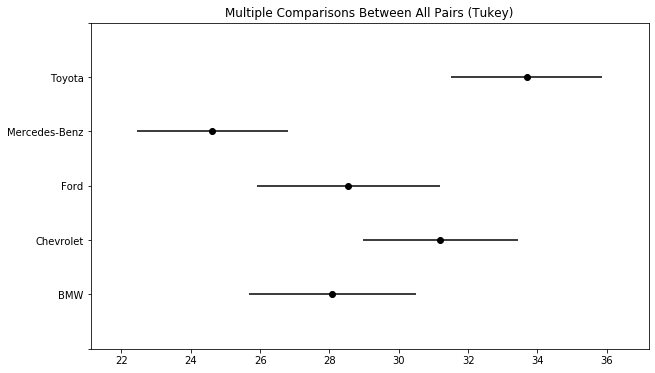

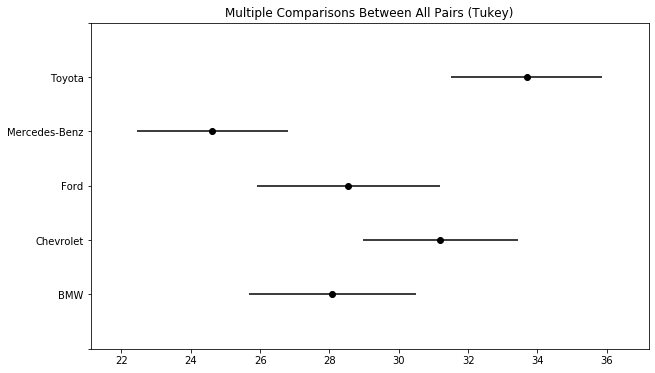

In [75]:
res.plot_simultaneous()

## Chi Square test of Independence

### is the drive train dependent of the typr of car??

- H0 : Drive train & type independent
- Ha : Drive train & type not independent

In [80]:
top3 = cars.Type.value_counts()[:3].index
sample = cars[cars.Type.isin(top3)]
ct = pd.crosstab(sample.Type, sample.DriveTrain)
ct

DriveTrain,All,Front,Rear
Type,,,
SUV,38,22,0
Sedan,28,179,55
Sports,5,8,36


In [82]:
chisquare , p , df, et = stats.chi2_contingency(ct)

In [83]:
print('Results : statistic={:.4f}, pvalue={}'.format(chisquare,p))

Results : statistic=161.6849, pvalue=6.361397099525641e-34


## Conclusions :
    - p value < alpha | 6.36 * 10 ^-34 <<<<<<<< 0.05
    - We reject the null hyypothesis 
    - Driove train is dependent of Type